# Historical News Data Acquisition

This notebook attempts to implement a scraper that is able to acquire titles and (ideally) full-text of historical news articles.

## Identifying Databases

Went through the list of databases that WWU Libraries gets and generated shortlist, then explored those DBs

**Potential Databases:**
- EBSCO Newspaper Source Plus
- ProQuest
    - *Global Newsstream*
    - New York Times with Index (1851)
    - Los Angeles Times (1881)
    - Wall Street Journal (1889)
    - Washington Post (1877)
    - Chicago Defender (1909)
    - Globe and Mail (1844)
    - Ethnic Newswatch (LP)
- Gale The Times (1785)
- ~~NCSE Aff. Svcs.~~
- Nexis Uni
- Nat'l Lib. of AU Trove
- ~~SerialsSolutions Ulrichsweb~~
- Readex America's Historical Newspapers

### Exploring

**Nexis Uni**
- Standardized RTF/PDF exporting!!!! Limited to 100 docs per DL, might hit bot detection?
- Pretty flexible (WWU)
- Global; might need to look into filtering...
- "News; English `disab*`" returns 11M
    - First: 1801 State of the Union Message
    - Last: 2024

**EBSCO NSP**
- Non-standardized PDFs, HTMLs - some may need OCR, non-standard formatting; drifting into CV task
- Would probably need to do kvm hijacking (WWU)
- Global
- `disab*` returns 403,727
    - First: NR 1974 NPR *All Things Considered* Trx
    - Last: 2024

**Gale The Times**
- Not the best OCR...
- Potential kvm hijacking (WWU)
- Only *The Times* (London, England)
- "Keyword: `disab*`" returns 71,381
    - First: 1785
    - Last: 1985

**Trove**
- Community-assisted OCR?
- Standard scraping!? (direct)
- Australia
- "Newspapers & Gazettes: `disab*`" returns 905,141
    - First: 1804 "Repost" from England
    - Last: 2021

**Readex AHN**
- Has, but not showing (not great) OCR
- Acquisition strategy unknown (WWU)
- USA
- "`disab*`" returns 22,990
    - First: 1704 (Boston)
    - Last: 1879

**PQ** (Assuming all other PQ DBs are subset of this)
- HTML text, can be downloaded as PDFs!
- Acquisition strategy unknown, kvm hijack likely
- Global
- "`disab*` w/ `fullText=True`, `sourceType=HistNewsPaper,NewsPaper`" returns 3.8M
    - First: 1844 *The Globe* (Toronto)
    - Last: 2024

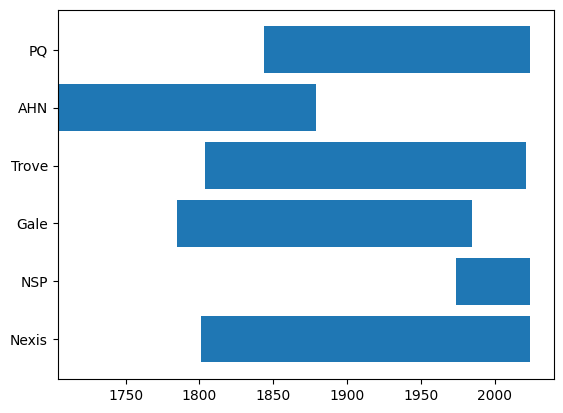

In [3]:
# Visualizing timespans

import matplotlib.pyplot as plt
import numpy as np
dbs = np.array(['Nexis', 'NSP', 'Gale', 'Trove', 'AHN', 'PQ'])
sty = np.array([1801,    1974,  1785,   1804,    1704,  1844])
edy = np.array([2024,    2024,  1985,   2021,    1879,  2024])
plt.barh(dbs, edy-sty, left=sty)
plt.show()

Based on the above timespan visualization, I am opting to pursue data acquisition from the following sources:
1. Entirety of Nexis search due to sheer volume and generous timespan
2. Run a pilot study on AHN to determine if it's "worth it" and/or able to get OCR (screen reader stuff?)
3. Run a pilot study to test if Nexis is superset of Trove

Additionally, I am exploring the following data source options to suppliment and provide noise:
- Kaggle "All the News Dataset", which contains 2.5M articles from between 2016 and 2020